# CamShift algorithm

   Explanations of the CamShift algorithm can be found at
   - [https://docs.opencv.org/4.x/d7/d00/tutorial_meanshift.html](https://docs.opencv.org/4.x/d7/d00/tutorial_meanshift.html)
   - [https://medium.com/@claudio.vindimian/understanding-and-implementing-the-camshift-object-tracking-algorithm-python-81587c24eda8](https://medium.com/@claudio.vindimian/understanding-and-implementing-the-camshift-object-tracking-algorithm-python-81587c24eda8)

In [51]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Histogram

In [52]:
rgb = cv2.imread('fruits.jpg')[..., ::-1]
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

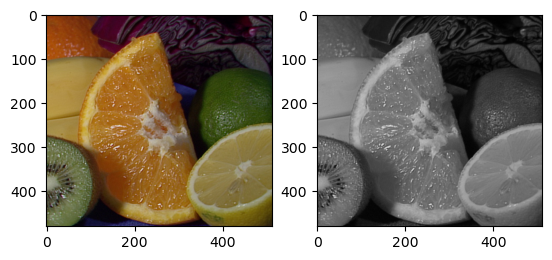

In [53]:
plt.subplot(1, 2, 1)
plt.imshow(rgb);
plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255);

In [54]:
h, _ = np.histogram(gray.ravel(), bins=np.arange(257))
h.shape, h

((256,),
 array([  15,  191,  782, 1009, 1367, 1843, 2190, 2032, 1714, 1487, 1387,
        1427, 1398, 1384, 1286, 1293, 1271, 1163, 1067, 1026,  965,  968,
         918, 1036, 1212, 1360, 1399, 1449, 1256, 1047, 1036,  945,  946,
         894,  881,  829,  847,  885,  859,  952,  897,  936,  909,  937,
        1035, 1032, 1023, 1085, 1075, 1149, 1180, 1259, 1309, 1441, 1499,
        1483, 1622, 1718, 1751, 1770, 1719, 1735, 1722, 1751, 1685, 1689,
        1635, 1556, 1515, 1377, 1347, 1248, 1226, 1199, 1204, 1217, 1200,
        1240, 1165, 1239, 1199, 1195, 1216, 1155, 1181, 1215, 1113, 1079,
        1168, 1182, 1198, 1210, 1237, 1266, 1310, 1393, 1373, 1603, 1717,
        1694, 1839, 1902, 1996, 1948, 2032, 2214, 2387, 2661, 2775, 2875,
        2810, 2870, 2865, 2846, 2831, 2869, 2883, 2815, 2749, 2694, 2612,
        2493, 2473, 2474, 2334, 2202, 2038, 1913, 1861, 1699, 1617, 1543,
        1492, 1457, 1400, 1418, 1443, 1423, 1455, 1376, 1292, 1371, 1475,
        1369, 1438, 1400, 154

In [55]:
gray.shape

(480, 512)

In [56]:
(gray == 2).sum()

782

## Compute histogram manually

In [57]:
def histogram2dgray_slow(gray: np.ndarray) -> np.ndarray:
    h = np.zeros(256, dtype=np.int64)
    for v in range(256):
        h[v] = (gray == v).sum()  # there are for loops inside this
    return h

In [58]:
h_slow = histogram2dgray_slow(gray)
h_slow

array([  15,  191,  782, 1009, 1367, 1843, 2190, 2032, 1714, 1487, 1387,
       1427, 1398, 1384, 1286, 1293, 1271, 1163, 1067, 1026,  965,  968,
        918, 1036, 1212, 1360, 1399, 1449, 1256, 1047, 1036,  945,  946,
        894,  881,  829,  847,  885,  859,  952,  897,  936,  909,  937,
       1035, 1032, 1023, 1085, 1075, 1149, 1180, 1259, 1309, 1441, 1499,
       1483, 1622, 1718, 1751, 1770, 1719, 1735, 1722, 1751, 1685, 1689,
       1635, 1556, 1515, 1377, 1347, 1248, 1226, 1199, 1204, 1217, 1200,
       1240, 1165, 1239, 1199, 1195, 1216, 1155, 1181, 1215, 1113, 1079,
       1168, 1182, 1198, 1210, 1237, 1266, 1310, 1393, 1373, 1603, 1717,
       1694, 1839, 1902, 1996, 1948, 2032, 2214, 2387, 2661, 2775, 2875,
       2810, 2870, 2865, 2846, 2831, 2869, 2883, 2815, 2749, 2694, 2612,
       2493, 2473, 2474, 2334, 2202, 2038, 1913, 1861, 1699, 1617, 1543,
       1492, 1457, 1400, 1418, 1443, 1423, 1455, 1376, 1292, 1371, 1475,
       1369, 1438, 1400, 1540, 1524, 1640, 1609, 14

In [59]:
(h_slow == h).all()

True

In [60]:
def histogram2dgray(gray: np.ndarray) -> np.ndarray:
    h = np.zeros(256, dtype=np.int64)
    height, width = gray.shape
    for y in range(height):
        for x in range(width):
            v = gray[y, x]
            h[v] = h[v] + 1
    return h

In [61]:
h_ = histogram2dgray(gray)
h_

array([  15,  191,  782, 1009, 1367, 1843, 2190, 2032, 1714, 1487, 1387,
       1427, 1398, 1384, 1286, 1293, 1271, 1163, 1067, 1026,  965,  968,
        918, 1036, 1212, 1360, 1399, 1449, 1256, 1047, 1036,  945,  946,
        894,  881,  829,  847,  885,  859,  952,  897,  936,  909,  937,
       1035, 1032, 1023, 1085, 1075, 1149, 1180, 1259, 1309, 1441, 1499,
       1483, 1622, 1718, 1751, 1770, 1719, 1735, 1722, 1751, 1685, 1689,
       1635, 1556, 1515, 1377, 1347, 1248, 1226, 1199, 1204, 1217, 1200,
       1240, 1165, 1239, 1199, 1195, 1216, 1155, 1181, 1215, 1113, 1079,
       1168, 1182, 1198, 1210, 1237, 1266, 1310, 1393, 1373, 1603, 1717,
       1694, 1839, 1902, 1996, 1948, 2032, 2214, 2387, 2661, 2775, 2875,
       2810, 2870, 2865, 2846, 2831, 2869, 2883, 2815, 2749, 2694, 2612,
       2493, 2473, 2474, 2334, 2202, 2038, 1913, 1861, 1699, 1617, 1543,
       1492, 1457, 1400, 1418, 1443, 1423, 1455, 1376, 1292, 1371, 1475,
       1369, 1438, 1400, 1540, 1524, 1640, 1609, 14

In [62]:
(h_ == h).all()

True

# Read the video object

In [63]:
cap = cv2.VideoCapture('hrnecek.mp4')
cap

< cv2.VideoCapture 000002A5CBC36D50>

In [64]:
cap.get(cv2.CAP_PROP_FPS)

30.0

In [65]:
cap.get(cv2.CAP_PROP_FRAME_WIDTH)

640.0

In [66]:
cap.get(cv2.CAP_PROP_POS_FRAMES)

0.0

In [67]:
ret, bgr = cap.read()  # reads the next frame
ret

True

In [68]:
bgr.shape, bgr.dtype

((480, 640, 3), dtype('uint8'))

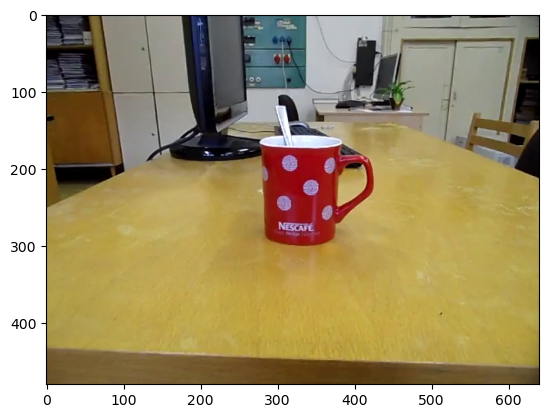

In [69]:
plt.imshow(bgr[..., ::-1]);

# CamShift step by step

## 1. Initialization

### 1.1. Position of the object

In [70]:
x1, y1 = 280, 160  # top-left
x2, y2 = 380, 295  # bottom-right

In [71]:
xc, yc = (x1 + x2) / 2, (y1 + y2) / 2  # center of the rectangle
xc, yc

(330.0, 227.5)

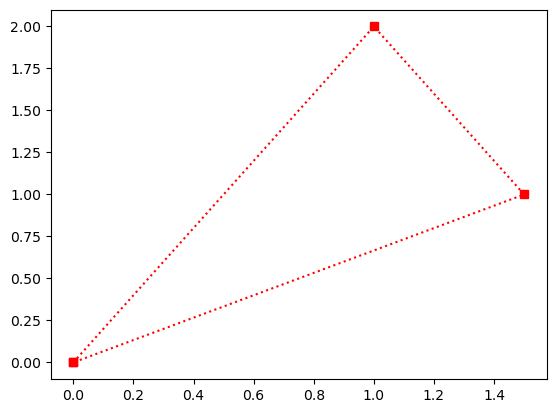

In [72]:
plt.plot([0., 1., 1.5, 0.], [0., 2., 1., 0.], linestyle=':', color='r', marker='s');

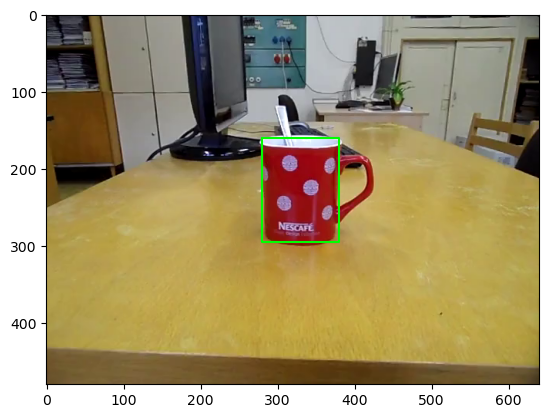

In [73]:
plt.imshow(bgr[..., ::-1])
plt.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], '-', color=(0, 1, 0));

### 1.2. Histogram of the hue component of the object

In [74]:
roi = bgr[y1:y2+1, x1:x2+1, ::-1]  # roi ... region of interest (rgb order)
roi.shape, roi.dtype

((136, 101, 3), dtype('uint8'))

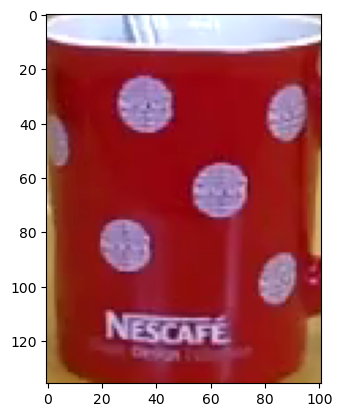

In [75]:
plt.imshow(roi);

In [76]:
hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)

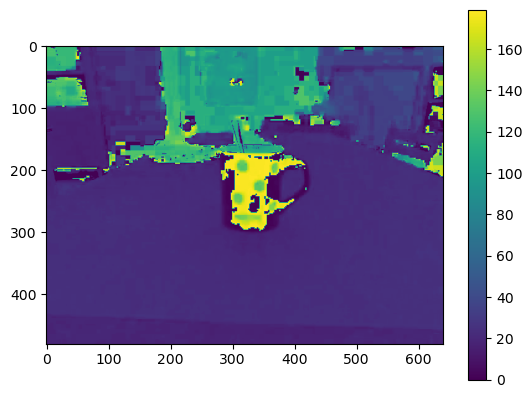

In [77]:
plt.imshow(hsv[..., 0])
plt.colorbar();

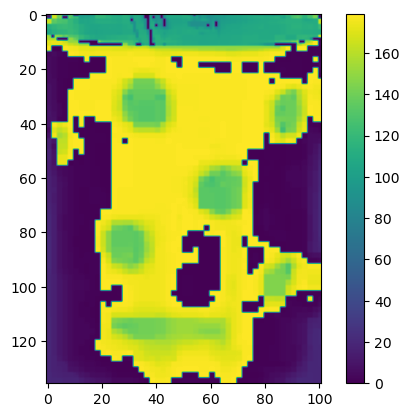

In [78]:
plt.imshow(hsv[y1:y2+1, x1:x2+1, 0])  # only show the object
plt.colorbar();

In [79]:
h0, b0 = np.histogram(hsv[y1:y2+1, x1:x2+1, 0], bins=np.arange(257))  # only computed from the roi
h0.shape

(256,)

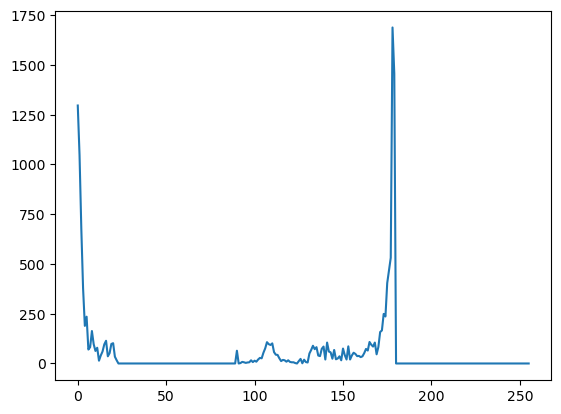

In [80]:
plt.plot(b0[:-1], h0);

## 2. Process next frame

In [81]:
ret, bgr = cap.read()  # read the next frame
ret

True

In [82]:
hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)  # convert to HSV
hsv.shape, hsv.dtype

((480, 640, 3), dtype('uint8'))

### 2.1. Histogram back projection

#### For the entire image (better for visualisation)

In [83]:
bp = np.zeros(bgr.shape[:2])
bp.shape

(480, 640)

In [84]:
%%time

for i in range(bp.shape[0]):
    for j in range(bp.shape[1]):
        h_ij = hsv[i, j, 0]
        bp[i, j] = h0[h_ij]

CPU times: total: 141 ms
Wall time: 189 ms


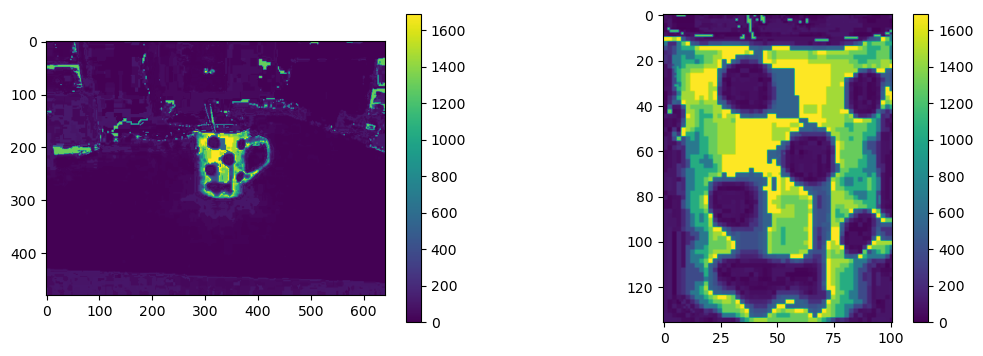

In [85]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(bp)
plt.colorbar();
plt.subplot(1, 2, 2)
plt.imshow(bp[y1:y2+1, x1:x2+1])
plt.colorbar();

#### Only for the region of interest (will be faster)

In [86]:
roi_bp = np.zeros(roi.shape[:2])
roi_bp.shape

(136, 101)

In [87]:
%%time

for i in range(roi_bp.shape[0]):
    for j in range(roi_bp.shape[1]):
        h_ij = hsv[y1 + i, x1 + j, 0]
        roi_bp[i, j] = h0[h_ij]

CPU times: total: 0 ns
Wall time: 6.04 ms


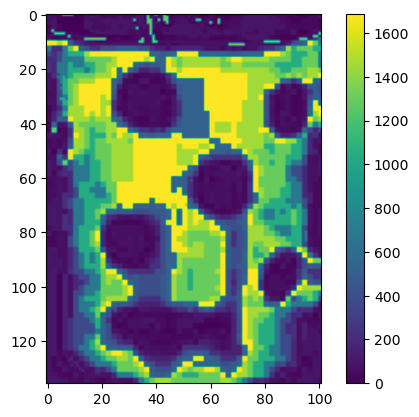

In [88]:
plt.imshow(roi_bp)
plt.colorbar();

#### Using Numpy indexing (good for visualisation and super fast)

In [89]:
%%time

bp_ = h0[hsv[..., 0]]

CPU times: total: 0 ns
Wall time: 2.02 ms


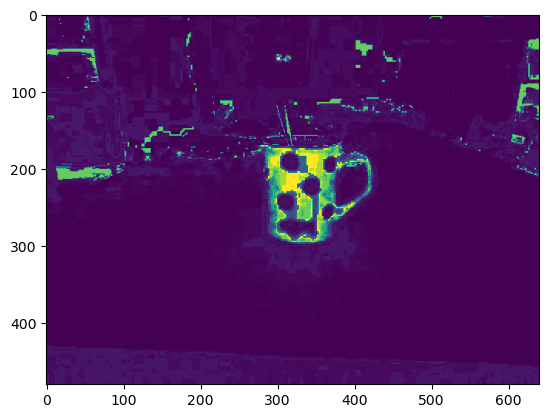

In [90]:
plt.imshow(bp_);

In [91]:
np.all(bp == bp_)

True

### 2.2. Compute the center of gravity of the ROI backprojection

In [92]:
%%time

n_, xc_, yc_ = 0., 0., 0.
for i in range(y1, y2 + 1):
    for j in range(x1, x2 + 1):
        xc_ += j * bp[i, j]
        yc_ += i * bp[i, j]
        n_ += bp[i, j]
xc_ /= n_
yc_ /= n_
xc_, yc_

CPU times: total: 0 ns
Wall time: 12.7 ms


(331.62266778757066, 224.48564502788935)

In [93]:
# bounding box translation vector (new center minus old center)
dx = xc_ - xc
dy = yc_ - yc
dx, dy 

(1.6226677875706628, -3.0143549721106524)

In [94]:
# new coordinates of the bounding box and round the coordinates to integers
x1_ = int(0.5 + x1 + dx)
y1_ = int(0.5 + y1 + dy)
x2_ = int(0.5 + x2 + dx)
y2_ = int(0.5 + y2 + dy)
x1_, y1_, x2_, y2_

(282, 157, 382, 292)

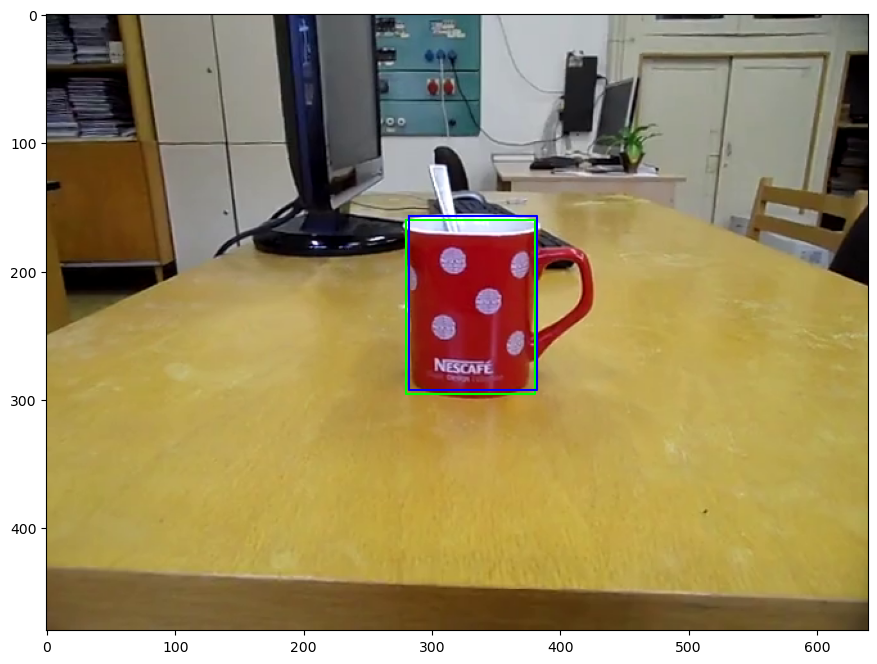

In [95]:
plt.figure(figsize=(12, 8))
plt.imshow(bgr[..., ::-1])  # imshow the new image
plt.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], '-', color=(0, 1, 0))  # plot the old bounding box
plt.plot([x1_, x2_, x2_, x1_, x1_], [y1_, y1_, y2_, y2_, y1_], '-', color=(0, 0, 1))  # plot the new bounding box
plt.show();

# Homework: Put it all together in a loop

## Initialization

In [96]:
# Define initial bounding box
x1, y1, x2, y2 = 280, 160, 380, 295  # Example coordinates
window = (x1, y1, x2, y2)

In [97]:
def calculate_histogram(image, mask):
    histogram = np.zeros(180)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if mask[i, j]:
                hue = image[i, j, 0]
                histogram[hue] += 1
    return histogram


In [98]:
def back_projection(hue_image, histogram):
    bp = np.zeros(hue_image.shape[:2])
    for i in range(hue_image.shape[0]):
        for j in range(hue_image.shape[1]):
            hue = hue_image[i, j, 0]
            bp[i, j] = histogram[hue]
    return bp


In [99]:
def camshift(bp, window):
    for _ in range(10):  # Iterate a fixed number of times
        x1, y1, x2, y2 = window
        roi = bp[y1:y2, x1:x2]
        m00 = np.sum(roi)
        if m00 == 0:
            break

        x_indices = np.arange(x2 - x1)
        y_indices = np.arange(y2 - y1)
        m10 = np.sum(np.dot(np.sum(roi, axis=0), x_indices))
        m01 = np.sum(np.dot(np.sum(roi, axis=1), y_indices))

        new_x = int(m10 / m00)
        new_y = int(m01 / m00)

        # Update window with the new center
        dx = int(new_x - (x2 - x1) / 2)
        dy = int(new_y - (y2 - y1) / 2)
        window = (x1 + dx, y1 + dy, x2 + dx, y2 + dy)
    return window


In [100]:
# Open video
cap = cv2.VideoCapture('hrnecek.mp4')

# First frame processing
ret, frame = cap.read()
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
roi = hsv[y1:y2, x1:x2]
mask = np.ones(roi.shape[:2], dtype=bool)  # Assume all pixels belong to the object
histogram = calculate_histogram(roi, mask)


## Main loop

In [101]:
# Process video
while True:
    ret, frame = cap.read()
    if not ret:
        break

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    bp = back_projection(hsv, histogram)
    window = camshift(bp, window)

    # Draw and display the box
    x1, y1, x2, y2 = window
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.imshow('Tracking', frame)

    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
